Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00025: Introduction to Vibration Theory


## Test P2 (2022/1): Discrete and continuous mdof systems

---

**NAME:** Gabriel Orso Garcia <br/>
**CARD:** 00275506


#### Instruções

1. Entregar a resolução da prova em arquivo único, com no máximo 10Mb, até às 24h de hoje, 25 de maio de 2022.
2. Recomenda-se verificar atentamente se todas as folhas da resolução foram incluídas no arquivo gerado, pois não serão aceitas entregas posteriores.
3. Na primeira folha do arquivo deve constar claramente o NOME e o cartão de MATRÍCULA.
4. A consulta ao material de estudo e o uso do computador para cálculos são LIVRES.
5. A prova deve ser realizada INDIVIDUALMENTE, sem recorrer ao auxílio de colegas ou outras pessoas! Caso se verifique o descumprimento desta regra, todos os envolvidos na fraude terão a nota da prova zerada.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from MRPy import *
import scipy.linalg as sc

## Questão 1

Um cabo com comportamento elástico linear é disposto horizontalmente.
O cabo tem comprimento total $L = 6{\rm m}$, rigidez axial $EA = 4000{\rm kN}$ 
e duas massas $m = 20{\rm kg}$ fixadas nos terços. 
O cabo tem uma protensão inicial $T_0 = 20{\rm kN}$. 
O amortecimento do sistema é $\zeta = 0.01$ (razão do crítico).
A rigidez à flexão bem como a massa do cabo são desprezáveis.
A aceleração da gravidade no local é $g = 9.81{\rm m/s^2}$.
Os dois graus de liberdade considerados são os deslocamentos verticais das
duas massas, $u_1(t)$ e $u_2(t)$.

<img src="PEC00025A_221_P2_Q1.jpg" alt="Question 1" width="680px"/>


Admitindo-se uma condição de pequenos deslocamentos, calcule os modos de vibração e as respectivas frequências naturais de vibração livre do sistema. 

_________________________________________________________

Para resolver esse problema, podemos calcular a matriz de flexibilidade do sistema, aplicando uma carga unitária em cada um dos graus de liberdade e medindo os deslocamentos nos outros.

Começando por aplicar uma carga unitária negativa em $u_2$ e fazendo-se o diagrama de corpo livre do bloco pendurado em $u_2$ (desconsiderando o peso próprio), temos:

$$ \sum{F_y} = (20kN + \Delta T_1)sin(\alpha_1) + (20kN + \Delta T_2)sin(\alpha_2) - 1 = 0 $$

onde $\alpha_1$ é o ângulo do cabo no lado direito do bloco, e $\Delta T_1$ é seu alongamento no lado direito. Os sub-índices 2 correspondem ao lado esquerdo.

Podemos calcular os ângulos (considerando o regime de pequenos deslocamentos) como:

$$ \alpha_1 = arctan(\dfrac{u_2}{L/3}) \therefore sin(\alpha_1) = \dfrac{3u_2}{L} $$
$$ \alpha_2 = arctan(\dfrac{u_2}{2L/3}) \therefore sin(\alpha_2) = \dfrac{3u_2}{2L} $$

Ainda considerando a condição de pequenos deslocamentos e dada a magnitude da protensão dos cabos, consideraremos que o acréscimo de tensão gerado pela deformação no cabo é nulo:

$$ \Delta T_1 = \Delta T_2 = 0 $$

Assim: 

$$ \sum{F_y} = 20kN*3*\dfrac{u_2}{L} + 20kN*\dfrac{3}{2}\dfrac{u_2}{L} - 1kN = 0 $$

Dai obtemos:

$$ u_2 = 6,667 cm $$

Por semelhança de triângulos:

$$ u_1 = \dfrac{u_2}{2} = 3,334 cm $$ 

Como o sistema é simétrico, a aplicação de uma força unitária em $u_1$ levaria a:

$$ u_1 = 6,667 cm $$
$$ u_2 = \dfrac{u_1}{2} = 3,334 cm $$

Assim, podemos montar a matriz de flexibilidade do sistema:

In [2]:
H = np.array(([6.6666666666667,3.3333333333334],
              [3.3333333333334,6.6666666666667])) #em cm/kN

H = H/1000/100 # em m/N

A matriz de rigidez pode ser calculada invertendo-se a matriz de flexibilidade:

In [3]:
K = np.linalg.inv(H)
print(K) # em m/N

[[ 20000. -10000.]
 [-10000.  20000.]]


Matriz de massa concentrada do sistema:

In [4]:
M = np.eye(2)*20
print(M)

[[20.  0.]
 [ 0. 20.]]


Os modos e frequências naturais de vibração são calculados com auxílio do numpy:

In [5]:
def vibration_modes(K, M):

# Uses scipy to solve the standard eigenvalue problem
    w2, Phi = sc.eig(K, M)

# Ensure ascending order of eigenvalues
    iw  = w2.argsort()
    w2  = w2[iw]
    Phi = Phi[:,iw]

# Eigenvalues to vibration frequencies
    wk  = np.sqrt(np.real(w2)) 
    fk  = wk/2/np.pi

    return fk, wk, Phi

fk, wk, Phi = vibration_modes(K,M)

print("Frequência natural do primeiro modo de vibração: {0:.2f} Hz".format(fk[0]))
print("Frequência natural do segundo  modo de vibração: {0:.2f} Hz".format(fk[1]))

Frequência natural do primeiro modo de vibração: 3.56 Hz
Frequência natural do segundo  modo de vibração: 6.16 Hz


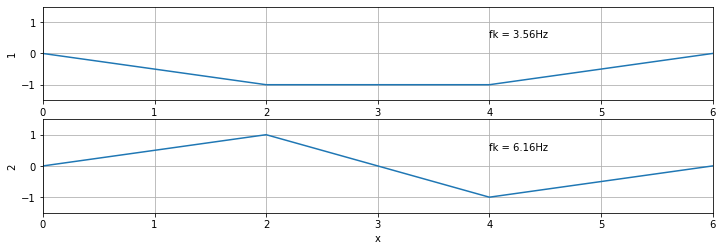

In [6]:
f1 = plt.figure(1, figsize=(12,10))
x  = np.arange(0, 7, 2)

for k in range(2):
    qk = np.zeros(4)
    qk[1:-1] = Phi[:,k]
    qk /= np.max(np.abs(qk))
    
    plt.subplot(5,1,k+1)
    plt.plot(x, qk)
    
    plt.xlim( 0.0, 6);
    plt.ylim(-1.5,  1.5);  plt.ylabel(str(k+1));
    plt.text(4, 0.5, 'fk = {0:3.2f}Hz'.format(fk[k]));
    plt.grid(True)

plt.xlabel('x');

## Questão 2

No grau de liberdade $u_1(t)$ do problema anterior é aplicada uma carga transiente, 
$F_1(t)$, dada pela função abaixo, com amplitude $F_0 = 500{\rm N}$ e duração 
$T_{\rm d} = 0.1{\rm s}$. A variável $\tau$ representa o tempo adimensionalizado 
por $T_{\rm d}$.

<img src="PEC00025A_221_P2_Q2.jpg" alt="Question 2" width="480px"/>  


Desconsiderando a parcela estática da resposta (devida ao peso próprio), e considerando todos os modos de vibração, apresente o deslocamento $u_1(t)$ como uma função do tempo.
Indique a amplitude e o instante no tempo em que o máximo deslocamento é atingido.

_______

Para resolver essa questão, utilizaremos a MRPy e a integral de Duhamel, modelando a carga através de um vetor:


Cargas aplicadas em cada grau de liberdade:


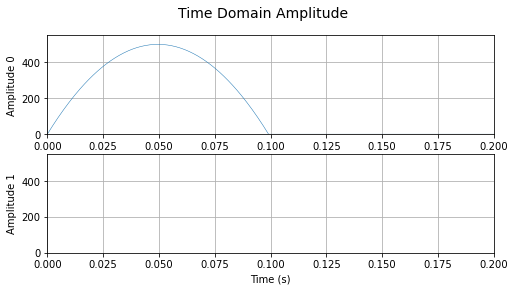

In [7]:
F0 = 500                             # Força aplicada (N)
td = 0.1
Td = 15                              # total integration time (s)
fs = 2048
N  = Td*fs                           # number of time step for Td discretization

t = np.linspace(0,td,int(td*fs))
F = MRPy.zeros(2,Td*fs,fs=fs)
i0 = int(td*fs)

F[0,0:i0] = 4*F0*(t/td - (t/td)**2)

F.plot_time(figsize=(8,4), axis_t = (0,0.2,0,550))
print("Cargas aplicadas em cada grau de liberdade:")

Definição do Carregamento Modal:

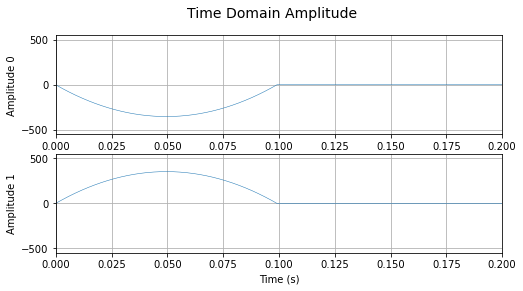

In [8]:
Mk = np.diag(M)
Kk = Mk*(wk**2)
Fk = MRPy(np.dot(Phi.T,F), fs=F.fs)
zk = np.array(([0.01, 0.01]))
Fk.plot_time(figsize=(8,4), axis_t = (0,0.2,-550,550))
print()

Deslocamentos Modais:

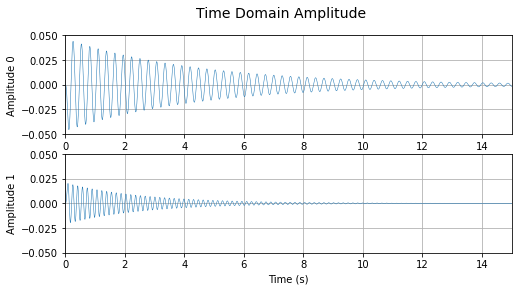

In [9]:
ak = MRPy(np.dot(np.diag(1/Mk), Fk), fs = Fk.fs)
uk = ak.sdof_Duhamel(fk, zk)
uk.plot_time(figsize=(8,4), axis_t = (0,15,-0.05,0.05))
print()

Deslocamentos do grau de liberdade $u_1$:

Deslocamento máximo: 42.41 mm
Instante de tempo: 0.10 s


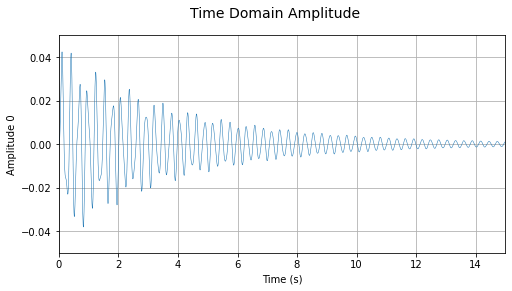

In [10]:
utot = MRPy(np.dot(Phi[0,:], uk), fs=uk.fs)
utot.plot_time(figsize=(8,4), axis_t = (0,15,-0.05,0.05))
print("Deslocamento máximo: {0:.2f} mm".format(utot[0,np.argmax(utot[0])]*1000))
print("Instante de tempo: {0:.2f} s".format(np.argmax(utot[0])/utot.fs))

Aproximando o gráfico na região inicial:

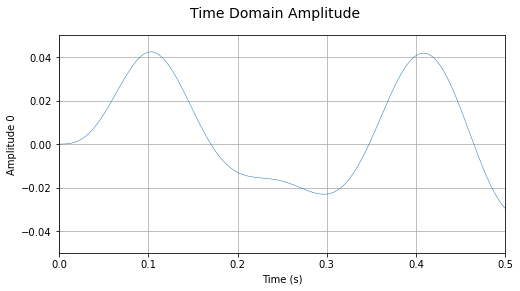

In [11]:
utot.plot_time(figsize=(8,4), axis_t = (0,0.5,-0.05,0.05))
print()

## Questão 3

Todos os elementos do pórtico elástico linear tem rigidez à flexão 
$EI = 6.5{\rm kN m^2}$ e massa por unidade de comprimento $\mu = 20{\rm kg/m}$.
Viga e colunas tem o mesmo comprimento $L = 4{\rm m}$.
O amortecimento do sistema é $\zeta = 0.01$ (razão do crítico).
A aceleração da gravidade no local é $g = 9.81{\rm m/s^2}$.

<img src="PEC00025A_221_P2_Q3.jpg" alt="Question 3" width="480px"/>  


Proponha funções adequadas para representar uma geometria deformada que aproxime o
primeiro modo de vibração e estime a frequência fundamental de vibração livre através 
do quociente de Rayleigh. Lembre que as energias totais serão computadas somando-se
a contribuição dos três elementos estruturais.
_(Sugere-se o uso do software Ftool para o cálculo da energia interna de deformação.)_

___

Será feita aqui uma solução por aproximação.

 - Pilares: Assumi para eles uma função de forma do tipo:
     
     $$ \varphi_p(x) = \dfrac{cos(\dfrac{x\pi}{3.5})-1}{1.90} $$
     
 - Viga: função do tipo:
 
     $$ \varphi_v(x) = sin(\dfrac{x\pi}{2}) $$
 
 As funções foram escolhidas "no olho", pela deformada informada acima - sempre observando para que os deslocamentos nos nós superiores do pórtico sejam iguais a 1.
 
Assim, podemos calcular $T_{ref}$ como:

   $$ T_{ref} = \dfrac{1}{2}\int_{0}^{L}(2\varphi_p(x)^2 + \varphi_v(x)^2)\mu dx $$

In [12]:
x = np.arange(0,4.001,0.01)
phi_p = (np.cos(x*np.pi/3.5)-1)/1.90
phi_v = np.sin(x*np.pi/2)

T_ref = (2*np.trapz(phi_p**2*20, x=x) + np.trapz(phi_v**2*20, x=x))/2

print("Energia cinética de referência: {0:.2f} J".format(T_ref))

Energia cinética de referência: 59.80 J


Aplicando-se uma força de $1kN$ no topo do pórtico no Ftool, obtemos um deslocamento igual a $0,5909mm$.

Isso nos permite calcular a força necessária para um deslocamento unitário:

$$ F = \dfrac{1000N*1m}{0.0005909m} = 1692333 N$$

E a energia potencial elástica através do trabalho das forças externas:

$$ V = \dfrac{1692333 N * 1 m}{2} = 846166.5 J $$

Assim, temos:

$$ \omega_k = \sqrt{\dfrac{V}{T_{ref}}} = \sqrt{\dfrac{846166.5}{59.80}} = 118.95 rad/s $$

$$ f = \dfrac{\omega_k}{2\pi} = 18.93 Hz $$

## Questão 4

O topo do pórtico é submetido a uma força horizontal estocástica, $F(t)$, com densidade 
espectral $S_F(f)$, ilustrada abaixo. A força tem média zero e valor r.m.s. 
$\sigma_F = 50{\rm N}$. A banda de frequências excitada é definida por $r = 10$
(eixo das frequências em hertz). 

<img src="PEC00025A_221_P2_Q4.jpg" alt="Question 4" width="420px"/>  


Estime o valor r.m.s. e o valor de pico do deslocamento horizontal $u(t)$ na
extremidade esquerda da viga. Calcule a correspondente _força estática equivalente_.

___

Definindo o periodograma da carga através de uma função do python. Nesse caso, a função foi definida no intervalo de 0 a 10 Hz.


Valor r.m.s da força 50.0


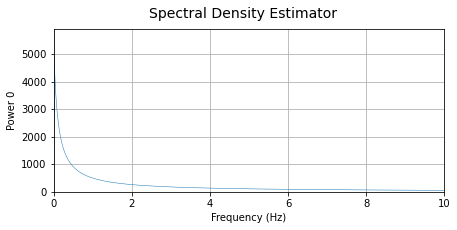

In [17]:
f = np.arange(0.1,10.01,0.01)


def SF_freq(f):
    if(f < 0.1 or f>10):
        return 0
    else:
        return (50)**2/(2*np.log(10)*f)
    
SF = np.zeros(991)
for i in range(991):
    SF[i] = SF_freq(f[i])
    
F = MRPy.from_periodogram(SF,20)

F.plot_freq(figsize=(7,3))
print("Valor r.m.s da força {0:.1f}".format(F.std()))

Levando em conta apenas o primeiro modo de vibração da estrutura temos:

$$ S_u(f) = |H(f)|^2 S_f(f) $$

$$ S_u(f) = \dfrac{1}{\omega_n^4}[{\dfrac{1}{(1-\beta^2)^2 + (2\zeta\beta)^2}}]*\dfrac{50^2}{2ln(10)f} $$

sendo:

$$ \beta = \dfrac{f}{f_n} $$

Para fazer essa operação a função $S_u(f)$ foi definida na HP Prime conforme acima,e a integral abaixo calculada:

$$ \sigma_u^2 = \int_{0.1}^{10}S_u(f)df = 1.3365*10^{-5} $$

Valor r.m.s da resposta em deslocamento:

$$ \sigma_u = \sqrt{ 1.3365*10^{-5}} = 3.656*10^{-3}m = 3.656mm $$

_______________

Para calcular o valor de pico, utilizarei a MRPy, gerando um gráfico de resposta do sistema a partir do espectro de resposta $S_u$:

Além disso, vou utilizar a MRPy para conferir a resposta do valor r.m.s do deslocamento:

In [14]:
def H(f):
    return (1/118.95**4)*(1/((1-(f/18.93)**2)**2 + (2*0.01*(f/18.93))**2))

SU = np.zeros(991)
for i in range(991):
    SU[i] = SF_freq(f[i])*H(f[i])
    
U = MRPy.from_periodogram(SU,20)
print("Valor r.m.s da resposta em deslocamento: {0:.3f} mm".format(U.std()*1000))

Valor r.m.s da resposta em deslocamento: 3.668 mm


Gráfico da resposta do sistema em deslocamento:

Deslocamento máximo: 13.85mm


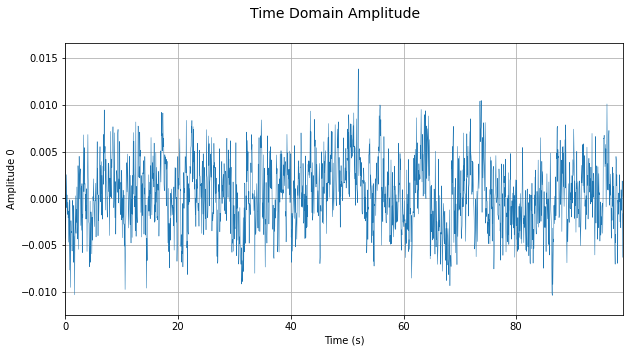

In [22]:
U.plot_time(figsize=(10,5))
umax = U[0,np.argmax(np.abs(U))]*1000
print("Deslocamento máximo: {0:.2f}mm".format(umax))


___
Esse valor pode variar de acordo com a série simulada pela MRPy, mas não se afasta muito do valor apresentado acima.

A força estática equivalente pode ser calculada através do coeficiente de mola encontrado na questão 3.

In [16]:
print("Força estática equivalente: {0:.2f}N".format(umax/1000*1692333))

Força estática equivalente: 23446.03N
